In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("Customers.csv", encoding='ISO-8859-1')
df2 =pd.read_csv("Exchange_Rates.csv")
df3 =pd.read_csv("Products.csv")
df4 =pd.read_csv("Sales.csv")
df5 =pd.read_csv("Stores.csv")

In [3]:
df1.shape

(15266, 10)

In [4]:
df1.dtypes

CustomerKey     int64
Gender         object
Name           object
City           object
State Code     object
State          object
Zip Code       object
Country        object
Continent      object
Birthday       object
dtype: object

In [5]:
df1["Birthday"] = pd.to_datetime(df1["Birthday"])

In [6]:
df1.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [7]:
df1["State Code"].describe()

count     15256
unique      467
top          CA
freq        740
Name: State Code, dtype: object

In [8]:
df1["State Code"].fillna("CA",inplace = True)

C:\Users\Karthikeyan P\AppData\Local\Temp\ipykernel_19172\14881143.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["State Code"].fillna("CA",inplace = True)


In [9]:
df2.dtypes

Date         object
Currency     object
Exchange    float64
dtype: object

In [10]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [11]:
df2.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

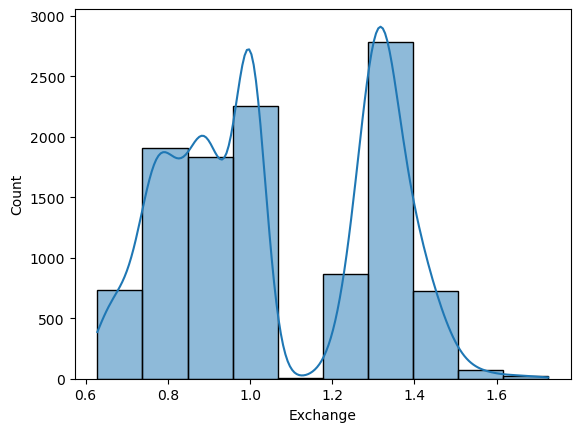

In [12]:
sns.histplot(data = df2,bins =10, x = "Exchange", kde = True)
plt.show()

In [13]:
df2.Exchange.head(10)

0    1.0000
1    1.1583
2    1.2214
3    0.8237
4    0.6415
5    1.0000
6    1.1682
7    1.2323
8    0.8304
9    0.6477
Name: Exchange, dtype: float64

In [14]:
df2_mean = np.mean(df2["Exchange"])
df2_max = np.max(df2["Exchange"])
df2_min = np.min(df2["Exchange"])

In [15]:
df2["Exchange"] = (df2["Exchange"] - df2_min)/(df2_max - df2_min)

In [16]:
df2["Exchange"].head(10)

0    0.338713
1    0.483042
2    0.540573
3    0.177972
4    0.011853
5    0.338713
6    0.492068
7    0.550511
8    0.184081
9    0.017505
Name: Exchange, dtype: float64

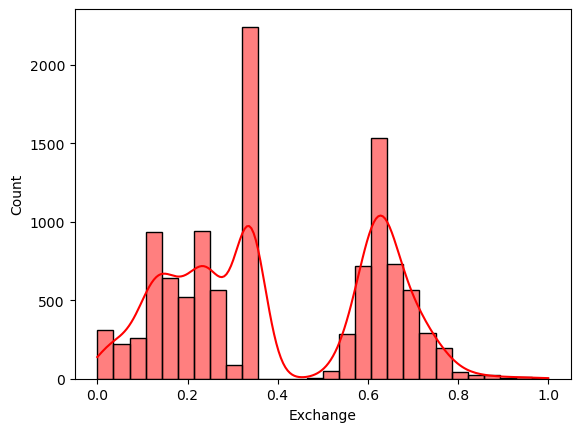

In [17]:
sns.histplot(df2["Exchange"], color='red', kde= True)
plt.show()

In [18]:
df3.dtypes

ProductKey         int64
Product Name      object
Brand             object
Color             object
Unit Cost USD     object
Unit Price USD    object
SubcategoryKey     int64
Subcategory       object
CategoryKey        int64
Category          object
dtype: object

In [19]:
df3.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [20]:
df3['Unit Cost USD'] = df3['Unit Cost USD'].replace({'\$': '', ',': ''}, regex=True).str.strip().astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Karthikeyan P\AppData\Local\Temp\ipykernel_19172\3410797361.py:1: SyntaxWarning: invalid escape sequence '\$'
  df3['Unit Cost USD'] = df3['Unit Cost USD'].replace({'\$': '', ',': ''}, regex=True).str.strip().astype(float)


In [21]:
df3['Unit Price USD'] = df3['Unit Price USD'].replace({'\$': '', ',': ''}, regex=True).str.strip().astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Karthikeyan P\AppData\Local\Temp\ipykernel_19172\3056672767.py:1: SyntaxWarning: invalid escape sequence '\$'
  df3['Unit Price USD'] = df3['Unit Price USD'].replace({'\$': '', ',': ''}, regex=True).str.strip().astype(float)


In [22]:
df3.dtypes

ProductKey          int64
Product Name       object
Brand              object
Color              object
Unit Cost USD     float64
Unit Price USD    float64
SubcategoryKey      int64
Subcategory        object
CategoryKey         int64
Category           object
dtype: object

In [23]:
df4.dtypes

Order Number      int64
Line Item         int64
Order Date       object
Delivery Date    object
CustomerKey       int64
StoreKey          int64
ProductKey        int64
Quantity          int64
Currency Code    object
dtype: object

In [24]:
df4.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [25]:
df4.shape

(62884, 9)

In [26]:
df4['Delivery Date'] = pd.to_datetime(df4['Delivery Date'])
df4['Order Date'] = pd.to_datetime(df4['Order Date'])

In [27]:
df4['Delivery Date'].fillna(np.mean(df4['Delivery Date']),inplace = True)

C:\Users\Karthikeyan P\AppData\Local\Temp\ipykernel_19172\2142019161.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['Delivery Date'].fillna(np.mean(df4['Delivery Date']),inplace = True)


In [28]:
df4.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

In [29]:
df4 = df4.drop_duplicates(subset='Order Number', keep='first')

In [30]:
df5.dtypes

StoreKey           int64
Country           object
State             object
Square Meters    float64
Open Date         object
dtype: object

In [31]:
df5.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [32]:
df5.shape

(67, 5)

In [33]:
df5['Open Date'] = pd.to_datetime(df5['Open Date'])

In [34]:
df5["Square Meters"].fillna(float(df5["Square Meters"].mode()), inplace = True)

C:\Users\Karthikeyan P\AppData\Local\Temp\ipykernel_19172\3237817481.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df5["Square Meters"].fillna(float(df5["Square Meters"].mode()), inplace = True)
C:\Users\Karthikeyan P\AppData\Local\Temp\ipykernel_19172\3237817481.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df5["Square Meters"].fillna(float(df5["Square Meters"].mode()), inplace = True)


In [35]:
df5_max = np.max(df5["Square Meters"])
df5_min = np.min(df5["Square Meters"])

In [36]:
df5["Square Meters"] = (df5["Square Meters"] - df5_min)/(df5_max - df5_min)

<Axes: xlabel='Square Meters', ylabel='Count'>

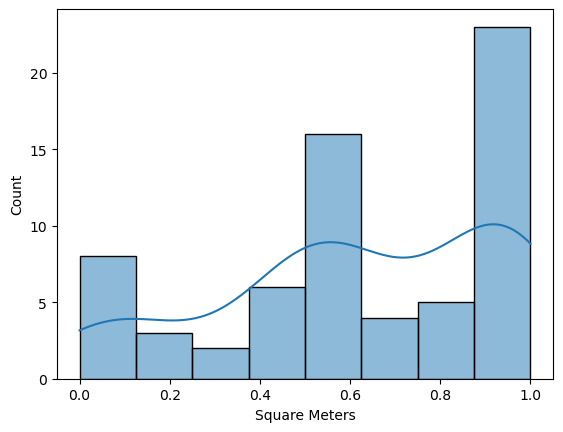

In [37]:
sns.histplot(data = df5, x= "Square Meters", kde = True)

In [38]:
def detect_outliers(data, df):

    m = np.mean(data)
    s = np.std(data)

    z_scores = (data - m) / s
    outlier_indices = df.index[np.abs(z_scores) > 2]
    df_cleaned = df.drop(outlier_indices)
    print(len(outlier_indices), "outliers detected and removed")
    
    return df_cleaned
            

In [39]:
df2 = detect_outliers(df2["Exchange"], df2)

52 outliers detected and removed


In [40]:
df5 = detect_outliers(df5["Square Meters"],df5)

1 outliers detected and removed


In [41]:
import mysql.connector

In [42]:
conn = mysql.connector.connect(host="localhost",  user="root",  password="karthik2005")


In [43]:
cursor = conn.cursor()

In [44]:
cursor.execute("CREATE DATABASE IF NOT EXISTS DATASP")
cursor.execute("USE DATASP")

In [45]:
cursor.execute('''CREATE TABLE IF NOT EXISTS CUSTOMERS (
    CustomerKey   INT PRIMARY KEY,
    Gender  VARCHAR(20),
    Name  VARCHAR(100),
    City  VARCHAR(50),
    State_Code VARCHAR(50),
    State  VARCHAR(100),
    Zip_Code VARCHAR(20),
    Country VARCHAR(20),
    Continent VARCHAR(20),
    Birthday DATE)''')


In [46]:
insert_query = '''
    INSERT INTO Customers (CustomerKey,Gender,Name,City,State_code,State,Zip_Code,Country,Continent,Birthday)
    VALUES (%s, %s, %s, %s,%s,%s,%s,%s,%s,%s)
'''

In [47]:
data = []
for i in df1.values:
    data.append(tuple(i))

In [48]:
cursor.executemany(insert_query, data)
conn.commit()
print(cursor.rowcount, "records inserted.")

15266 records inserted.


In [49]:
cursor.execute('''CREATE TABLE IF NOT EXISTS PRODUCTS (
    ProductKey INT PRIMARY KEY,
    ProductName VARCHAR(100),
    Brand VARCHAR(100),
    Color VARCHAR(100),
    Unit_Cost_USD FLOAT,
    Unit_Price_USD FLOAT,
    SubcategoryKey INT,
    Subcategory VARCHAR(100),
    CategoryKey INT,
    Category VARCHAR(100)
)''')


In [50]:
insert_query = '''
    INSERT INTO PRODUCTS (ProductKey,ProductName,Brand,Color,Unit_Cost_USD,Unit_Price_USD,SubcategoryKey,Subcategory,
    CategoryKey,Category)
    VALUES (%s, %s, %s, %s,%s,%s,%s,%s,%s,%s)
'''

In [51]:
data = []
for i in df3.values:
    data.append(tuple(i))

In [52]:
cursor.executemany(insert_query, data)
conn.commit()
print(cursor.rowcount, "records inserted.")

2517 records inserted.


In [53]:
cursor.execute('''CREATE TABLE IF NOT EXISTS SALES (
    OrderNumber INT PRIMARY KEY,
    LineItem INT,
    OrderDate DATE,
    DeliveryDate DATE,
    CustomerKey INT,
    StoreKey INT,
    ProductKey INT,
    Quantity INT,
    CurrencyCode VARCHAR(50)

)''')


In [54]:
insert_query = '''
    INSERT INTO SALES (OrderNumber,LineItem,OrderDate,DeliveryDate,CustomerKey,StoreKey,ProductKey,Quantity,CurrencyCode)

    VALUES (%s, %s, %s, %s,%s,%s,%s,%s,%s)
'''

In [55]:
data = []
for i in df4.values:
    data.append(tuple(i))

In [56]:
cursor.executemany(insert_query, data)
conn.commit()
print(cursor.rowcount, "records inserted.")

26326 records inserted.


In [57]:
cursor.execute('''CREATE TABLE IF NOT EXISTS STORES (
    StoreKey INT PRIMARY KEY,
    Country VARCHAR(50),
    State VARCHAR(50),
    SquareMeters FLOAT,
    OpenDate DATE

)''')


In [58]:
insert_query = '''
    INSERT INTO STORES (StoreKey, Country, State, SquareMeters, OpenDate)

    VALUES (%s, %s, %s, %s,%s)
'''

In [59]:
data = []
for i in df5.values:
    data.append(tuple(i))

In [60]:
cursor.executemany(insert_query, data)
conn.commit()
print(cursor.rowcount, "records inserted.")

66 records inserted.


In [61]:
cursor.execute('''CREATE TABLE IF NOT EXISTS EXCHANGE_RATES (
    Date DATE,
    Currency VARCHAR(20),
    Exchange FLOAT
)''')

In [62]:
insert_query = '''
    INSERT INTO EXCHANGE_RATES (Date, Currency, Exchange)

    VALUES (%s, %s, %s)
'''

In [63]:
data = []
for i in df2.values:
    data.append(tuple(i))

In [64]:
cursor.executemany(insert_query, data)
conn.commit()
print(cursor.rowcount, "records inserted.")

11163 records inserted.


In [65]:
cursor.execute("Show tables;")

In [66]:
for i in cursor.fetchall():
    print(i)

('customers',)
('exchange_rates',)
('products',)
('sales',)
('stores',)


# CUSTOMER ANALYSIS

# 1) distribution with respect to continent and country

In [67]:
cursor.execute("SELECT CONTINENT, COUNTRY, COUNT(*) AS COUNT FROM CUSTOMERS GROUP BY CONTINENT,COUNTRY;")

In [68]:
for i in cursor.fetchall():
    print(i)

('Australia', 'Australia', 1420)
('North America', 'Canada', 1553)
('Europe', 'Germany', 1473)
('Europe', 'France', 670)
('Europe', 'Italy', 645)
('Europe', 'Netherlands', 733)
('Europe', 'United Kingdom', 1944)
('North America', 'United States', 6828)


# 2) distribution with respect to gender

In [69]:
cursor.execute("SELECT GENDER,COUNT(*) AS COUNT FROM CUSTOMERS GROUP BY GENDER")

In [70]:
for i in cursor.fetchall():
    print(i)

('Female', 7518)
('Male', 7748)


# 3) distribution with respect to age

In [71]:
cursor.execute('''SELECT
    CASE
        WHEN age BETWEEN 0 AND 10 THEN '0-10'
        WHEN age BETWEEN 11 AND 20 THEN '11-20'
        WHEN age BETWEEN 21 AND 30 THEN '21-30'
        WHEN age BETWEEN 31 AND 40 THEN '31-40'
        WHEN age BETWEEN 41 AND 50 THEN '41-50'
        WHEN age BETWEEN 51 AND 60 THEN '51-60'
        WHEN age BETWEEN 61 AND 70 THEN '61-70'
        WHEN age BETWEEN 71 AND 80 THEN '71-80'
        ELSE '81+'
    END AS age_range,
    COUNT(*) AS count
FROM (
    SELECT
        FLOOR(DATEDIFF(CURDATE(), birthday) / 365) AS age
    FROM customers
) AS age_data
GROUP BY age_range
ORDER BY MIN(age);
''')

In [72]:
for i in cursor.fetchall():
    print(i)

('21-30', 1933)
('31-40', 2263)
('41-50', 2273)
('51-60', 2288)
('61-70', 2335)
('71-80', 2255)
('81+', 1919)


# SALES

# 4) the products that were more frequently ordered

In [73]:
cursor.execute("""
    SELECT products.productname ,sales.productkey, COUNT(*) AS frequency
    FROM sales JOIN products ON products.productkey = sales.productkey
    GROUP BY sales.productkey
    HAVING COUNT(*) > 60
    ORDER BY frequency DESC
""")


In [74]:
for i in cursor.fetchall():
    print(i)

('WWI Desktop PC1.80 E1800 White', 458, 82)
('WWI Desktop PC2.30 M2300 Silver', 451, 80)
('Adventure Works Desktop PC1.80 ED180 Silver', 419, 70)
('WWI Desktop PC1.80 E1801 Brown', 454, 69)
('Adventure Works Desktop PC1.80 ED182 White', 437, 69)
('WWI Desktop PC1.80 E1801 Black', 448, 68)
('Adventure Works Desktop PC2.30 MD230 Black', 423, 68)
('WWI Desktop PC2.33 X2330 Brown', 450, 67)
('Adventure Works Desktop PC1.80 ED182 Brown', 432, 67)
('Adventure Works Desktop PC2.33 XD233 Brown', 428, 67)
('WWI Desktop PC1.80 E1800 Silver', 453, 67)
('Adventure Works Desktop PC1.80 ED182 Silver', 420, 66)
('WWI Desktop PC2.30 M2300 Brown', 439, 66)
('WWI Desktop PC1.60 E1600 Red', 452, 66)
('Adventure Works Desktop PC2.30 MD230 Silver', 417, 65)
('Adventure Works Desktop PC3.0 MS300 Black', 427, 65)
('WWI Desktop PC1.60 E1600 Black', 446, 65)
('Adventure Works Desktop PC2.33 XD233 Silver', 416, 65)
('Adventure Works Desktop PC2.33 XD233 Black', 422, 65)
('Adventure Works Desktop PC1.60 ED160 Bl

# 5) Analysing the currency code used

In [75]:
cursor.execute("SELECT DISTINCT CURRENCYCODE FROM SALES")

In [76]:
for i in cursor.fetchall():
    print(i[0])

CAD
USD
GBP
EUR
AUD


In [77]:
cursor.execute("SELECT CURRENCYCODE, COUNT(*) AS FREQ FROM SALES GROUP BY CURRENCYCODE ORDER BY FREQ DESC LIMIT 1;")

In [78]:
print("The currency code used the most is ",cursor.fetchall()[0][0])

The currency code used the most is  USD


# 6) Analysing the Quantity and finding out the products having high demand !

In [79]:
cursor.execute("SELECT DISTINCT QUANTITY FROM SALES;")

In [80]:
for i in cursor.fetchall():
    print(i)

(1,)
(2,)
(7,)
(6,)
(4,)
(9,)
(5,)
(3,)
(8,)
(10,)


In [81]:
cursor.execute("SELECT products.productname,sales.quantity from products JOIN sales ON products.productkey = sales.productkey where sales.quantity >= 10")

In [82]:
for i in cursor.fetchall():
    print(i)

('Litware Refrigerator 19CuFt M760 Brown', 10)
('SV DVD 15-Inch Player Portable L200 Black', 10)
("Fabrikam Home and Vacation Moviemaker 1'' 25mm M400 Grey", 10)
('MGS Rise of Nations: Rise of Legends 2008 E137', 10)
('The Phone Company Touch Screen Phone 1600 TFT-1.4" L250 Grey', 10)
('Adventure Works Desktop PC1.80 ED182 Brown', 10)
('WWI Desktop PC2.30 M2300 Silver', 10)
('Contoso Microwave 0.8CuFt E0080 Red', 10)
('Fabrikam Coffee Maker 4C E080 Black', 10)
('Contoso Multi-Use Terminal Cable E308 White', 10)
('SV Hand Games for 12-16 boys E60 Yellow', 10)
('Proseware 23ppm Laser Printer with Wireless and Wired Network Interfaces M680 Black', 10)
('Contoso In front of Centrex L15 Black', 10)
('MGS Hand Games for Office worker L299 Red', 10)
('MGS Hand Games for 12-16 boys E600 Black', 10)
('SV Hand Games for kids E30 Silver', 10)
('Litware Refrigerator 24.7CuFt X980 Silver', 10)
('Contoso SLR Camera 35" X358 Black', 10)
('Contoso Water Heater 7.2GPM X1800 Grey', 10)
('WWI Desktop PC2

# PRODUCTS

# 7) Analysing the categories , subcategories and brand of the products

In [83]:
cursor.execute("SELECT CATEGORY,SUBCATEGORY,BRAND, COUNT(*) AS 'NO.OF OPTIONS' FROM PRODUCTS GROUP BY CATEGORY,SUBCATEGORY,BRAND;") 

In [84]:
for i in cursor.fetchall():
    print(i)

('Audio', 'MP4&MP3', 'Contoso', 45)
('Audio', 'Recording Pen', 'Wide World Importers', 20)
('Audio', 'Bluetooth Headphones', 'Northwind Traders', 27)
('Audio', 'Bluetooth Headphones', 'Wide World Importers', 23)
('TV and Video', 'Televisions', 'Adventure Works', 50)
('TV and Video', 'VCD & DVD', 'Southridge Video', 26)
('TV and Video', 'Home Theater System', 'Litware', 48)
('TV and Video', 'Home Theater System', 'Contoso', 52)
('TV and Video', 'Car Video', 'Southridge Video', 46)
('Computers', 'Laptops', 'Fabrikam', 24)
('Computers', 'Laptops', 'Adventure Works', 28)
('Computers', 'Laptops', 'Wide World Importers', 14)
('Computers', 'Laptops', 'Proseware', 12)
('Computers', 'Desktops', 'Adventure Works', 22)
('Computers', 'Desktops', 'Wide World Importers', 23)
('Computers', 'Monitors', 'Proseware', 28)
('Computers', 'Monitors', 'Adventure Works', 28)
('Computers', 'Monitors', 'Wide World Importers', 22)
('Computers', 'Projectors & Screens', 'Proseware', 36)
('Computers', 'Projectors &

# 8) Stores that have taken more than 600 orders

In [85]:
cursor.execute("""
    SELECT stores.storekey,stores.country,stores.state, COUNT(*) AS frequency
    FROM sales JOIN stores ON sales.storekey = stores.storekey
    GROUP BY sales.storekey
    HAVING COUNT(*) > 600
    ORDER BY frequency DESC
""")


In [86]:
for i in cursor.fetchall():
    print(i)

(0, 'Online', 'Online', 5580)
(9, 'Canada', 'Northwest Territories', 658)
(54, 'United States', 'Nebraska', 629)
(61, 'United States', 'South Carolina', 624)
(55, 'United States', 'Nevada', 622)
(59, 'United States', 'Oregon', 619)
(45, 'United States', 'Connecticut', 617)
(44, 'United States', 'Arkansas', 606)
(57, 'United States', 'New Mexico', 605)
(50, 'United States', 'Kansas', 605)


# 9) Store that has maximum storage area :

In [87]:
cursor.execute("SELECT storekey,country,state FROM STORES where squaremeters > 0.9;")

In [88]:
for i in cursor.fetchall():
    print(i)

(0, 'Online', 'Online')
(3, 'Australia', 'South Australia')
(4, 'Australia', 'Tasmania')
(5, 'Australia', 'Victoria')
(6, 'Australia', 'Western Australia')
(8, 'Canada', 'Newfoundland and Labrador')
(22, 'Germany', 'Freistaat Thüringen')
(27, 'Germany', 'Sachsen-Anhalt')
(30, 'Italy', 'Pesaro')
(37, 'United Kingdom', 'Ayrshire')
(39, 'United Kingdom', 'Blaenau Gwent')
(41, 'United Kingdom', 'Fermanagh')
(44, 'United States', 'Arkansas')
(45, 'United States', 'Connecticut')
(49, 'United States', 'Iowa')
(50, 'United States', 'Kansas')
(52, 'United States', 'Mississippi')
(54, 'United States', 'Nebraska')
(55, 'United States', 'Nevada')
(59, 'United States', 'Oregon')
(61, 'United States', 'South Carolina')
(63, 'United States', 'Utah')


# 10) analysing the revenue generated !

In [89]:
cursor.execute("SELECT productname , UNIT_PRICE_USD - UNIT_COST_USD AS REVENUE FROM PRODUCTS where UNIT_PRICE_USD - UNIT_COST_USD > 1500;")

In [90]:
for i in cursor.fetchall():
    print(i)

('Adventure Works 52" LCD HDTV X590 Silver', 1939.1699829101562)
('Adventure Works 52" LCD HDTV X590 Black', 1939.1699829101562)
('Adventure Works 52" LCD HDTV X590 White', 1939.1699829101562)
('Adventure Works 52" LCD HDTV X590 Brown', 1939.1699829101562)
('Proseware Projector 1080p LCD86 Black', 1534.6199951171875)
('Proseware Projector 1080p DLP86 Black', 1671.030029296875)
('Proseware Projector 1080p LCD86 White', 1534.6199951171875)
('Proseware Projector 1080p DLP86 White', 1671.030029296875)
('Proseware Projector 1080p LCD86 Silver', 1534.6199951171875)
('Proseware Projector 1080p DLP86 Silver', 1671.030029296875)
('Contoso Projector 1080p X980 Black', 1534.6199951171875)
('Contoso Projector 1080p X981 Black', 1671.030029296875)
('Contoso Projector 1080p X980 White', 1534.6199951171875)
('Contoso Projector 1080p X981 White', 1671.030029296875)
('Contoso Projector 1080p X980 Silver', 1534.6199951171875)
('Contoso Projector 1080p X981 Silver', 1671.030029296875)
('WWI Projector 108